# Tasks
- removed all the columns that found in RFECV
    - `race`, `native-country`, `fnlwgt`, `education`, `relationship`, `gender`, 

- Balance the dataset to directly by using `SmoteTomek` by keeping the ratio 1 for majority and minority class.

- Split the dataset `70-30` ratio
- Null values for both train and test have been replaced with `mean` of train.
- Highest accuracy 
    - no scaling for *X_train or x_test*
        - `('LightGBM', 0.8526581587388248)`
    - both *X_train and x_test scaled*
        - StandardScaler `('LightGBM', 0.8530676312018016)`
        - MinMaxScaler `('LightGBM', 0.8526581587388248)`

# Import Libraries

In [51]:
import pandas as pd
import my_packages as mypckg
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

# Dataset

In [52]:
df = pd.read_csv('../data/adult.csv', na_values="?", skipinitialspace=True)

## Categorical Data Encoding

In [53]:
# encode the dataset
df , mappings = mypckg.encoder(df)

In [54]:
mypckg.show(mappings)

{
    "workclass": {
        "Private": 0,
        "Local-gov": 1,
        "Self-emp-not-inc": 2,
        "Federal-gov": 3,
        "State-gov": 4,
        "Self-emp-inc": 5,
        "Without-pay": 6,
        "Never-worked": 7
    },
    "education": {
        "11th": 0,
        "HS-grad": 1,
        "Assoc-acdm": 2,
        "Some-college": 3,
        "10th": 4,
        "Prof-school": 5,
        "7th-8th": 6,
        "Bachelors": 7,
        "Masters": 8,
        "Doctorate": 9,
        "5th-6th": 10,
        "Assoc-voc": 11,
        "9th": 12,
        "12th": 13,
        "1st-4th": 14,
        "Preschool": 15
    },
    "marital-status": {
        "Never-married": 0,
        "Married-civ-spouse": 1,
        "Widowed": 2,
        "Divorced": 3,
        "Separated": 4,
        "Married-spouse-absent": 5,
        "Married-AF-spouse": 6
    },
    "occupation": {
        "Machine-op-inspct": 0,
        "Farming-fishing": 1,
        "Protective-serv": 2,
        "Other-service": 3,
        

## Feature and Target Separation

In [55]:
X = df.drop(['race', 'native-country', 'fnlwgt', 'education', 'relationship', 'gender', 'income'], axis=1)
y = df['income']

In [56]:
print(X)

       age  workclass  educational-num  marital-status  occupation  \
0       25        0.0                7               0         0.0   
1       38        0.0                9               1         1.0   
2       28        1.0               12               1         2.0   
3       44        0.0               10               1         0.0   
4       18        NaN               10               0         NaN   
...    ...        ...              ...             ...         ...   
48837   27        0.0               12               1         8.0   
48838   40        0.0                9               1         0.0   
48839   58        0.0                9               2         6.0   
48840   22        0.0                9               0         6.0   
48841   52        5.0                9               1         7.0   

       capital-gain  capital-loss  hours-per-week  
0                 0             0              40  
1                 0             0              50  
2  

In [57]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


## Splitting

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(34189, 8)
(34189,)
(14653, 8)
(14653,)


## Finding and Removing Null Values

In [59]:
print(X_train.isnull().sum())

age                   0
workclass          1969
educational-num       0
marital-status        0
occupation         1977
capital-gain          0
capital-loss          0
hours-per-week        0
dtype: int64


In [60]:
print(X_test.isnull().sum())

age                  0
workclass          830
educational-num      0
marital-status       0
occupation         832
capital-gain         0
capital-loss         0
hours-per-week       0
dtype: int64


In [61]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64


In [62]:
X_test.fillna(X_train.mean(), inplace=True)
print(X_test.isnull().sum())

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64


## Allign the y_train and y_test according to the indecies of X_train and X_test

In [63]:
y_train = y_train.loc[X_train.index]
y_test= y_test.loc[X_test.index]

## Balance the Dataset

In [64]:
y_train.describe()

count    34189.000000
mean         0.241803
std          0.428182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [65]:
y_train.shape

(34189,)

In [66]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34189 entries, 42392 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
34189 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


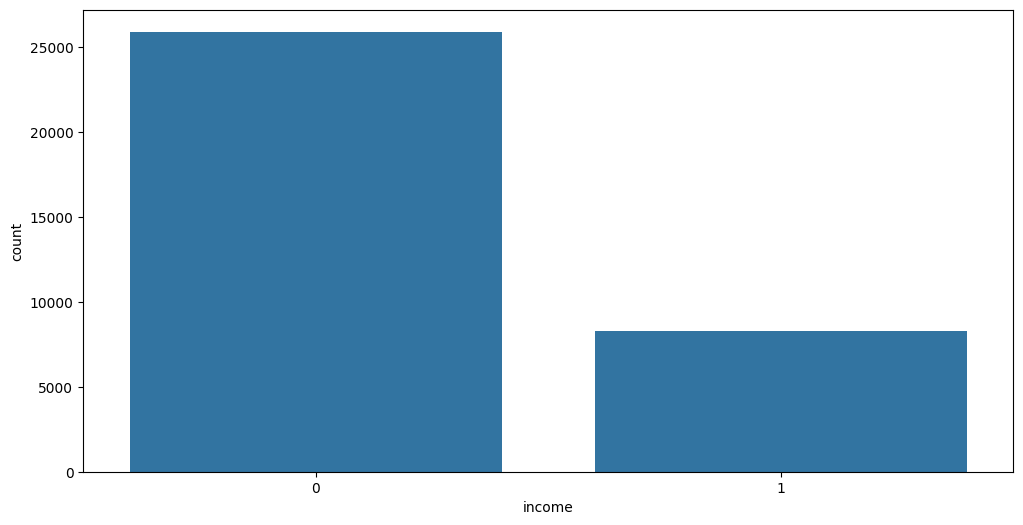

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

In [68]:
y_train.value_counts()

income
0    25922
1     8267
Name: count, dtype: int64

In [69]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=1, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

print(f"Y after resampling: {Counter(y_train)}")

Y after resampling: Counter({0: 25607, 1: 25607})


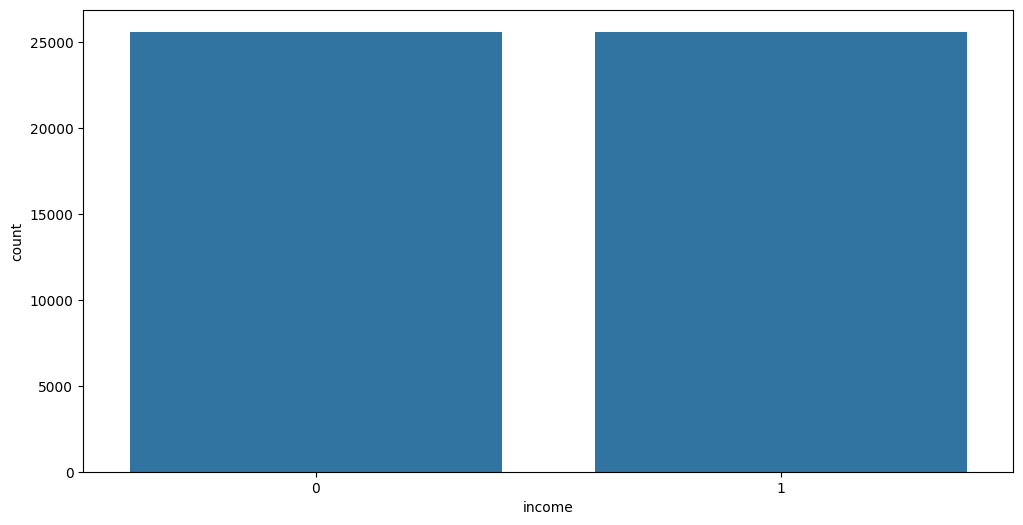

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

## Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_scaled_ss_train = ss.transform(X_train)
X_scaled_ss_test = ss.transform(X_test)

In [72]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)
X_scaled_mm_train = mm.fit_transform(X_train)
X_scaled_mm_test = mm.fit_transform(X_test)

# Apply Models

In [73]:
models = mypckg.get_models()
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Classifier': SVC(),
 'Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'LightGBM': LGBMClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None,

In [74]:
accuracies = mypckg.run_the_models(models, X_train, y_train, X_test, y_test)

Model: Logistic Regression
Accuracy: 0.7557496758343002
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83     11233
           1       0.48      0.74      0.58      3420

    accuracy                           0.76     14653
   macro avg       0.69      0.75      0.71     14653
weighted avg       0.81      0.76      0.77     14653

Confusion Matrix:
[[8555 2678]
 [ 901 2519]]
--------------------------------------------------------------------------------
Accuracy for Logistic Regression: 0.7557496758343002


Model: Decision Tree
Accuracy: 0.8151914283764417
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     11233
           1       0.59      0.68      0.63      3420

    accuracy                           0.82     14653
   macro avg       0.74      0.77      0.75     14653
weighted avg       0.83      0.82      0.82     14653

Confusion Mat

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8264519211083055
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     11233
           1       0.59      0.82      0.69      3420

    accuracy                           0.83     14653
   macro avg       0.77      0.83      0.78     14653
weighted avg       0.86      0.83      0.84     14653

Confusion Matrix:
[[9295 1938]
 [ 605 2815]]
--------------------------------------------------------------------------------
Accuracy for AdaBoost: 0.8264519211083055


[LightGBM] [Info] Number of positive: 25607, number of negative: 25607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 51214, number of used features: 8
[LightGBM] [I

## Highest Accuracy

In [75]:
mypckg.highest_accuracy(accuracies)

The higest accuracy in this experiment:
LightGBM -->> 0.8526581587388248


('LightGBM', 0.8526581587388248)